Chalenge: To determine the effects of Covid-19 in the U.S as it relates to the stock values of major shipping companies.

Hypothesis: The pandemic is inversely correlated with the rise of major shipping companie stock prices.

Process:

  1. Pull covid-19 infection data in U.S. and sort by date
  2. Pull stock information for various logistic corporations after first covid-19 infections began.
  3. Calculate any correlations between covid-19 and individual stock prices
  4. Evaluate any changes in market value for individual stocks
  5. Evaluate the percentage of market change for all stocks.

# Covid-19 DataSet

https://www.kaggle.com/sudalairajkumar/covid19-in-usa

## Import Libraries

In [ ]:
import datetime
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
# Store dataset in a Pandas Dataframe
from google.colab import drive
drive.mount("/content/gdrive")



Mounted at /content/gdrive


## Create Clean Covid-19 Dataframe

In [ ]:
covid_df = pd.read_csv("/content/gdrive/MyDrive/Thinkful/CAPSTONE3 /us-counties.csv") 
covid_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
# Create table with running total of cases and deaths and remove the fips column
covid_total = covid_df.groupby(['date']).sum()
covid_total = covid_total.drop(['fips'], axis=1)
covid_total

,cases,deaths
date,,
2020-01-21,1,0.0
2020-01-22,1,0.0
2020-01-23,1,0.0
2020-01-24,2,0.0
2020-01-25,3,0.0
...,...,...
2021-01-26,25484820,425211.0
2021-01-27,25640449,429312.0
2021-01-28,25805713,433180.0


Text(0, 0.5, 'Cases in Millions')

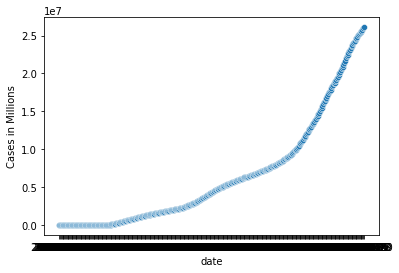

In [ ]:
# Scatterplot representing total cases
sns.scatterplot(x="date", y="cases", data=covid_total)
plt.ylabel('Cases in Millions')

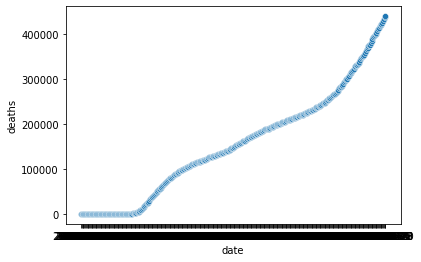

In [ ]:
# Scatterplot representing total deaths
sns.scatterplot(x="date", y="deaths", data=covid_total)

In [ ]:
# For visual effect, I created table with number of cases and deaths by date 
covid_by_date = covid_df.groupby(['date']).sum()
covid_by_date = covid_by_date.sort_values(by =['date'])
covid_by_date = covid_by_date -  covid_by_date.shift(1)
covid_by_date  = covid_by_date.drop(['fips'], axis=1)

In [ ]:
covid_by_date.describe()

,cases,deaths
count,375.000000,375.000000
mean,69614.032000,1171.789333
std,72467.300219,1012.979676
min,0.000000,0.000000
25%,22684.000000,429.500000
50%,42862.000000,971.000000
75%,83079.500000,1544.500000
max,300594.000000,4406.000000


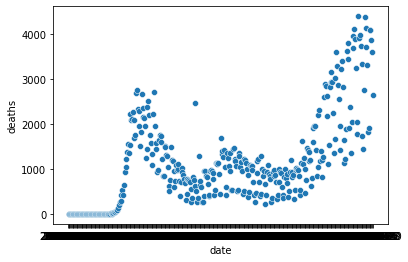

In [ ]:
# Scatterplot representing daily deaths
sns.scatterplot(x="date", y="deaths", data=covid_by_date)

Text(0, 0.5, 'Cases in Millions')

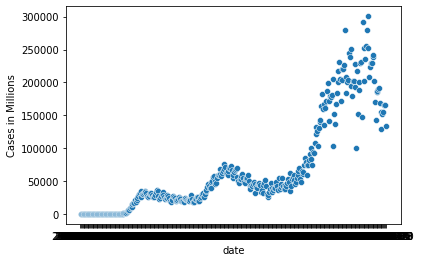

In [ ]:
# Scatterplot representing daily cases
sns.scatterplot(x="date", y="cases", data=covid_by_date)
plt.ylabel('Cases in Millions')

# Stock Values During Covid-19 Dataset

In this dataset I will be looking at the following stock values:

  AMKBY - Maersk

  CICOY - Cosco Shipping

  DAC - Danaos Shipping Co. 

  DPSGY - DHL 

  FDX - FedEx

  INSW - International Seaways Inc

  MATX - Matson, Inc

  NAT - Nordic American Tanker Ltd

  SBLK - Star Bulk Carriers Corp.

  SFL - SFL Corporation Ltd. (Marine Shipping)

  UPS - United Parcel Service

  ^DJI - Dow Jones Industrial

  ^GSPC - S&P 500

  ^IXIC - Nasdaq Index
  


## Import Libraries

In [ ]:
!pip install yfinance
import seaborn as sns
import datetime
import yfinance as yf
from pandas_datareader import data as web

     |████████████████████████████████| 5.5MB 12.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=d190f0a8ce4b1b4b8590d8965d29ac6655ff2476f243669f402caefd91262fd4
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Create Clean Stock Value Dataset

In [ ]:
# Set stock values to analyize
stocks = ["AMKBY","CICOY", "DAC", "DPSGY", "FDX", "INSW", "MATX", "NAT", "SBLK", "SFL", "UPS", "^DJI", "^GSPC", "^IXIC"]

In [ ]:
# Set start and end dates for during covid-19
start = datetime.datetime(2020, 1, 1)
end   = datetime.datetime(2020, 12, 31)

In [ ]:
# Grab data
data = pdr.get_data_yahoo(stocks, start = start, end = end)

In [ ]:
# Select only Adjusted Closed Stock Price
adj_close = ['Adj Close']
data[adj_close]

Attributes  Adj Close                   ...                                         
Symbols         AMKBY CICOY        DAC  ...          ^DJI        ^GSPC         ^IXIC
Date                                    ...                                         
2020-01-02   6.987317  2.33   9.400000  ...  28868.800781  3257.850098   9092.190430
2020-01-03   6.793225  2.33   9.190000  ...  28634.880859  3234.850098   9020.769531
2020-01-06   6.696179  2.33   9.610000  ...  28703.380859  3246.280029   9071.469727
2020-01-07   6.783520  2.33   9.580000  ...  28583.679688  3237.179932   9068.580078
2020-01-08   6.686474  2.11   9.440000  ...  28745.089844  3253.050049   9129.240234
...               ...   ...        ...  ...           ...          ...           ...
2020-12-24  11.170000  5.23  21.010000  ...  30199.869141  3703.060059  12804.730469
2020-12-28  11.190000  5.23  21.030001  ...  30403.970703  3735.360107  12899.419922
2020-12-29  11.250000  5.80  20.330000  ...  30335.669922  3727.040039  12850.219727
2020-12-30  11.150000  5.85  20.580000  ...  30409.560547  3732.040039  12870.000000
2020-12-31  11.110000  6.17  21.430000  ...  30606.480469  3756.070068  12888.280273

[253 rows x 14 columns]

In [ ]:
stocks_df = data[adj_close]

In [ ]:
# Relabel columns 
stocks_df.columns = ["Maersk", "Cosco Shipping", "Danaos Shipping", "DHL", "FedEx", "International Seaways", "Matson", "Nordic American", "Star Bulk Carriers", "SFL Corp", "UPS", "Dow Jones", "S&P 500", "Nasdaq"]

# Merge Covid-19 Dataframe and Stock Value Dataframe by Date

In [ ]:
# Merge dataframes by Index using date
covid_stocks_df = pd.merge(covid_total, stocks_df, how='inner', left_index=True, right_index=True)

In [ ]:
covid_stocks_df.head()

,cases,deaths,Maersk,Cosco Shipping,Danaos Shipping,DHL,FedEx,International Seaways,Matson,Nordic American,Star Bulk Carriers,SFL Corp,UPS,Dow Jones,S&P 500,Nasdaq
2020-01-21,1,0.0,6.133312,1.93,7.61,36.412567,155.200943,26.464970,38.361725,3.944933,10.306302,12.840142,113.610794,29196.039062,3320.790039,9370.809570
2020-01-22,1,0.0,6.065380,1.93,7.20,36.422276,153.240356,25.981096,38.391010,3.927083,9.700049,12.696477,113.484978,29186.269531,3321.750000,9383.769531
2020-01-23,1,0.0,6.016856,1.93,7.33,35.606632,152.590118,25.645348,38.469101,3.882457,9.372077,12.633624,113.165604,29160.089844,3325.540039,9402.480469
2020-01-24,2,0.0,6.084789,1.93,6.99,35.422142,151.792099,24.292473,38.264114,3.650402,9.173305,12.400167,112.904289,28989.730469,3295.469971,9314.910156
2020-01-27,5,0.0,5.871287,1.93,6.54,34.548244,146.294586,23.808599,37.795578,3.489749,8.447789,12.220583,111.220299,28535.800781,3243.629883,9139.309570


In [ ]:
covid_stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-01-21 to 2020-12-31
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cases                  241 non-null    int64  
 1   deaths                 241 non-null    float64
 2   Maersk                 241 non-null    float64
 3   Cosco Shipping         241 non-null    float64
 4   Danaos Shipping        241 non-null    float64
 5   DHL                    241 non-null    float64
 6   FedEx                  241 non-null    float64
 7   International Seaways  241 non-null    float64
 8   Matson                 241 non-null    float64
 9   Nordic American        241 non-null    float64
 10  Star Bulk Carriers     241 non-null    float64
 11  SFL Corp               241 non-null    float64
 12  UPS                    241 non-null    float64
 13  Dow Jones              241 non-null    float64
 14  S&P 500                241 non-null    

In [ ]:
covid_stocks_df.describe()

,cases,deaths,Maersk,Cosco Shipping,Danaos Shipping,DHL,FedEx,International Seaways,Matson,Nordic American,Star Bulk Carriers,SFL Corp,UPS,Dow Jones,S&P 500,Nasdaq
count,2.410000e+02,241.000000,241.000000,241.00000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,4.975517e+06,133885.385892,6.748204,2.33722,6.894979,38.017637,186.894553,18.653895,38.858041,3.687634,6.859231,8.684332,128.878613,26790.461578,3215.109002,10251.811442
std,5.160584e+06,99251.589757,1.952912,1.17040,4.344092,8.447786,64.770457,3.180756,10.661320,0.719425,1.133207,1.664046,32.656033,2541.996892,326.802336,1489.496946
min,1.000000e+00,0.000000,3.493659,1.26000,2.780000,20.109446,89.600357,12.857842,24.664156,2.248411,3.920000,5.920000,84.222221,18591.929688,2237.399902,6860.669922
25%,6.723550e+05,34418.000000,4.990000,1.48000,4.080000,30.013664,129.276413,16.333899,29.533646,3.150000,6.200000,7.404234,98.345596,25445.939453,3009.050049,9192.339844
50%,3.379846e+06,135402.000000,6.260000,1.88000,5.090000,37.665157,160.430832,17.704159,36.316914,3.604232,6.860000,8.637179,113.905342,27272.300781,3276.239990,10461.419922
75%,7.550848e+06,210756.000000,7.910000,2.67000,8.210000,46.000000,258.690674,20.934980,43.668518,4.162513,7.650000,9.408612,163.110001,28653.869141,3426.959961,11420.980469
max,2.002622e+07,346039.000000,11.570000,6.17000,21.430000,50.849998,300.776428,28.008038,61.459999,6.708675,10.306302,12.840142,175.469986,30606.480469,3756.070068,12899.419922


# Analysis

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
from scipy import stats

In [ ]:
# Here I create a dataframe using only the shipping stocks.
ship_stocks = covid_stocks_df.drop(['cases', 'deaths', 'Dow Jones', 'S&P 500', 'Nasdaq'],axis=1)

In [ ]:
ship_stocks.head()

,Maersk,Cosco Shipping,Danaos Shipping,DHL,FedEx,International Seaways,Matson,Nordic American,Star Bulk Carriers,SFL Corp,UPS
2020-01-21,6.133312,1.93,7.61,36.412567,155.200943,26.464970,38.361725,3.944933,10.306302,12.840142,113.610794
2020-01-22,6.065380,1.93,7.20,36.422276,153.240356,25.981096,38.391010,3.927083,9.700049,12.696477,113.484978
2020-01-23,6.016856,1.93,7.33,35.606632,152.590118,25.645348,38.469101,3.882457,9.372077,12.633624,113.165604
2020-01-24,6.084789,1.93,6.99,35.422142,151.792099,24.292473,38.264114,3.650402,9.173305,12.400167,112.904289
2020-01-27,5.871287,1.93,6.54,34.548244,146.294586,23.808599,37.795578,3.489749,8.447789,12.220583,111.220299


## Visuals

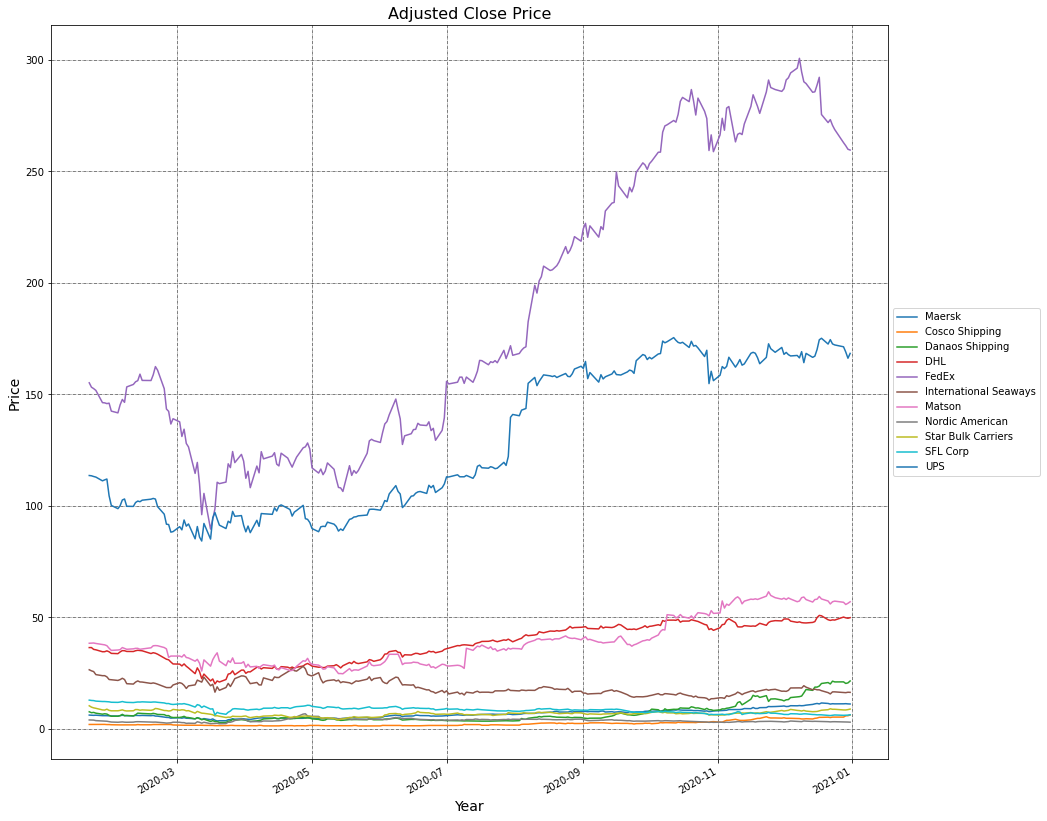

In [ ]:
# Plot all the close prices
ship_stocks.plot(figsize=(15, 15))
# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

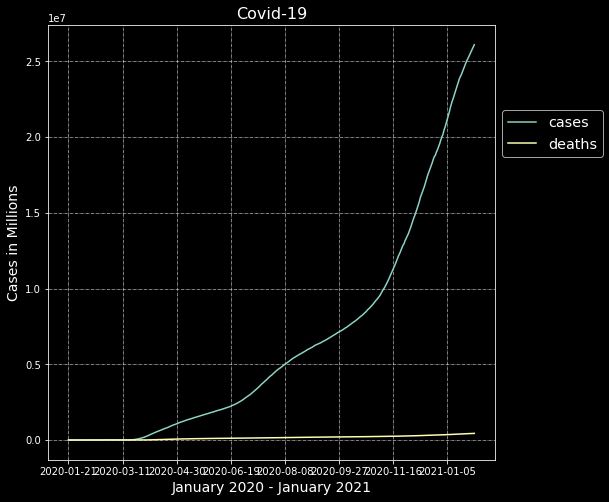

In [ ]:
# Plot all Covid-19 Cases
plt.style.use('dark_background')
covid_total.plot(figsize=(8, 8))
# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75), fontsize="x-large")
# Define the label for the title of the figure
plt.title("Covid-19", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Cases in Millions', fontsize=14)
plt.xlabel('January 2020 - January 2021', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='white', linestyle='-.', linewidth=0.5)
plt.show()

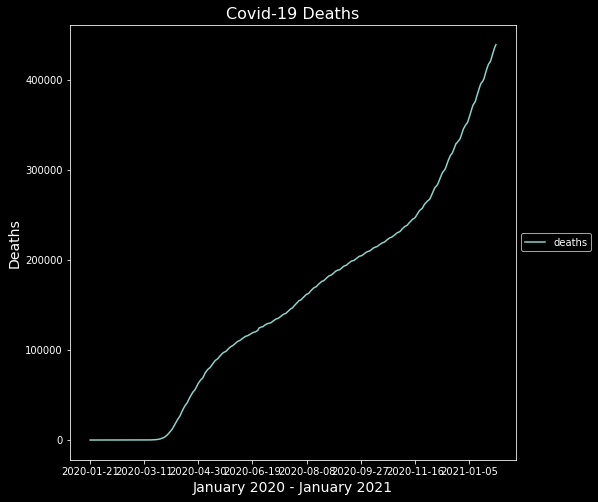

In [ ]:
# Plot all Covid-19 deaths
covid_total['deaths'].plot(figsize=(8, 8))
# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Define the label for the title of the figure
plt.title("Covid-19 Deaths", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Deaths', fontsize=14)
plt.xlabel('January 2020 - January 2021', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

## Pearsonr Testing


In [ ]:
# Examine Dataframe Coorelations
covid_corr = covid_stocks_df.corr()
covid_corr

,cases,deaths,Maersk,Cosco Shipping,Danaos Shipping,DHL,FedEx,International Seaways,Matson,Nordic American,Star Bulk Carriers,SFL Corp,UPS,Dow Jones,S&P 500,Nasdaq
cases,1.000000,0.943115,0.962215,0.948715,0.891410,0.843987,0.890609,-0.588493,0.893615,-0.231601,0.344590,-0.786526,0.858802,0.657245,0.772597,0.877011
deaths,0.943115,1.000000,0.918157,0.825001,0.717769,0.897298,0.887251,-0.694911,0.806760,-0.044400,0.190229,-0.823912,0.900172,0.630595,0.777518,0.925765
Maersk,0.962215,0.918157,1.000000,0.934854,0.866460,0.928922,0.935648,-0.600299,0.923496,-0.244130,0.500320,-0.658719,0.908393,0.814254,0.895768,0.942219
Cosco Shipping,0.948715,0.825001,0.934854,1.000000,0.936621,0.782671,0.860318,-0.480015,0.934331,-0.369057,0.478281,-0.647196,0.794321,0.699891,0.769207,0.806235
Danaos Shipping,0.891410,0.717769,0.866460,0.936621,1.000000,0.657824,0.756329,-0.310890,0.858670,-0.366812,0.523446,-0.528860,0.661134,0.664661,0.700664,0.701821
DHL,0.843987,0.897298,0.928922,0.782671,0.657824,1.000000,0.947218,-0.712321,0.847918,-0.152394,0.441546,-0.598179,0.959655,0.836471,0.921923,0.967451
FedEx,0.890609,0.887251,0.935648,0.860318,0.756329,0.947218,1.000000,-0.686865,0.930304,-0.300711,0.408408,-0.679573,0.961913,0.758268,0.846527,0.900817
International Seaways,-0.588493,-0.694911,-0.600299,-0.480015,-0.310890,-0.712321,-0.686865,1.000000,-0.551385,0.393753,-0.154513,0.688015,-0.711809,-0.402237,-0.525089,-0.665315
Matson,0.893615,0.806760,0.923496,0.934331,0.858670,0.847918,0.930304,-0.551385,1.000000,-0.400321,0.499363,-0.621384,0.856765,0.758032,0.818812,0.831142
Nordic American,-0.231601,-0.044400,-0.244130,-0.369057,-0.366812,-0.152394,-0.300711,0.393753,-0.400321,1.000000,-0.458136,0.159681,-0.193955,-0.190325,-0.145541,-0.077075


In [ ]:
# Show stocks for only the begining and end of the dataframe
ship_stocks_change = ship_stocks.iloc[[0, -1]]
ship_stocks_change

,Maersk,Cosco Shipping,Danaos Shipping,DHL,FedEx,International Seaways,Matson,Nordic American,Star Bulk Carriers,SFL Corp,UPS
2020-01-21,6.133312,1.93,7.61,36.412567,155.200943,26.46497,38.361725,3.944933,10.306302,12.840142,113.610794
2020-12-31,11.110000,6.17,21.43,49.840000,259.619995,16.33000,56.970001,2.950000,8.830000,6.280000,168.399994


In [ ]:
# Show the difference in values by percent
percent_change_df = ship_stocks_change.pct_change(axis='rows')
percent_change_df

,Maersk,Cosco Shipping,Danaos Shipping,DHL,FedEx,International Seaways,Matson,Nordic American,Star Bulk Carriers,SFL Corp,UPS
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,0.811419,2.196891,1.816032,0.368758,0.672799,-0.382958,0.485074,-0.252205,-0.143243,-0.510909,0.482253


In [ ]:
transposed_df = percent_change_df.T
print(transposed_df)

                       2020-01-21  2020-12-31
Maersk                        NaN    0.811419
Cosco Shipping                NaN    2.196891
Danaos Shipping               NaN    1.816032
DHL                           NaN    0.368758
FedEx                         NaN    0.672799
International Seaways         NaN   -0.382958
Matson                        NaN    0.485074
Nordic American               NaN   -0.252205
Star Bulk Carriers            NaN   -0.143243
SFL Corp                      NaN   -0.510909
UPS                           NaN    0.482253


In [ ]:
trans_df = transposed_df.iloc[:, -1]
trans_df

Maersk                   0.811419
Cosco Shipping           2.196891
Danaos Shipping          1.816032
DHL                      0.368758
FedEx                    0.672799
International Seaways   -0.382958
Matson                   0.485074
Nordic American         -0.252205
Star Bulk Carriers      -0.143243
SFL Corp                -0.510909
UPS                      0.482253
Name: 2020-12-31 00:00:00, dtype: float64

In [ ]:
trans_df = trans_df*100

In [ ]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}%'.format

In [ ]:
trans_df

Maersk                   81.14%
Cosco Shipping          219.69%
Danaos Shipping         181.60%
DHL                      36.88%
FedEx                    67.28%
International Seaways   -38.30%
Matson                   48.51%
Nordic American         -25.22%
Star Bulk Carriers      -14.32%
SFL Corp                -51.09%
UPS                      48.23%
Name: 2020-12-31 00:00:00, dtype: float64

In [ ]:
# Sort dataframe by Largest stock market loss to smallest
trans_df = trans_df.sort_values(ascending=True)
trans_df

SFL Corp                -51.09%
International Seaways   -38.30%
Nordic American         -25.22%
Star Bulk Carriers      -14.32%
DHL                      36.88%
UPS                      48.23%
Matson                   48.51%
FedEx                    67.28%
Maersk                   81.14%
Danaos Shipping         181.60%
Cosco Shipping          219.69%
Name: 2020-12-31 00:00:00, dtype: float64

In [ ]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
CDR_corr = covid_corr.iloc[3:, : 3]

In [ ]:
# Merge by Index
corr_loss = pd.merge(CDR_corr, trans_df, how='inner', left_index=True, right_index=True)
corr_loss

,cases,deaths,Maersk,2020-12-31 00:00:00
Cosco Shipping,0.95,0.83,0.93,219.69
Danaos Shipping,0.89,0.72,0.87,181.60
DHL,0.84,0.90,0.93,36.88
FedEx,0.89,0.89,0.94,67.28
International Seaways,-0.59,-0.69,-0.60,-38.30
Matson,0.89,0.81,0.92,48.51
Nordic American,-0.23,-0.04,-0.24,-25.22
Star Bulk Carriers,0.34,0.19,0.50,-14.32
SFL Corp,-0.79,-0.82,-0.66,-51.09
UPS,0.86,0.90,0.91,48.23


In [ ]:
corr_loss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Cosco Shipping to UPS
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cases                10 non-null     float64
 1   deaths               10 non-null     float64
 2   Maersk               10 non-null     float64
 3   2020-12-31 00:00:00  10 non-null     float64
dtypes: float64(4)
memory usage: 400.0+ bytes


In [ ]:
corr_loss = corr_loss.drop(["Maersk"], axis=1)

In [ ]:
corr_loss.columns = ['Cases', 'Deaths', '% Change']
corr_loss

,Cases,Deaths,% Change
Cosco Shipping,0.95,0.83,219.69
Danaos Shipping,0.89,0.72,181.60
DHL,0.84,0.90,36.88
FedEx,0.89,0.89,67.28
International Seaways,-0.59,-0.69,-38.30
Matson,0.89,0.81,48.51
Nordic American,-0.23,-0.04,-25.22
Star Bulk Carriers,0.34,0.19,-14.32
SFL Corp,-0.79,-0.82,-51.09
UPS,0.86,0.90,48.23


In [ ]:
corr_loss = corr_loss.round(decimals=2)

In [ ]:
corr_loss

,Cases,Deaths,% Change
SFL Corp,-0.79,-0.82,-51.09
International Seaways,-0.59,-0.69,-38.30
Nordic American,-0.23,-0.04,-25.22
Star Bulk Carriers,0.34,0.19,-14.32
DHL,0.84,0.9,36.88
UPS,0.86,0.9,48.23
Matson,0.89,0.81,48.51
FedEx,0.89,0.89,67.28
Danaos Shipping,0.89,0.72,181.60
Cosco Shipping,0.95,0.83,219.69


In [ ]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
corr_loss[['Cases', 'Deaths']] = corr_loss[['Cases', 'Deaths']].astype(str)

In [ ]:
# corr_loss = corr_loss.style.highlight_min('% Change', color = 'lightgreen', axis = 0).highlight_max('% Change', color = 'pink', axis = 0).format('{0:,}')

In [ ]:
corr_loss

,Cases,Deaths,% Change
Cosco Shipping,0.95,0.83,219.69
Danaos Shipping,0.89,0.72,181.60
DHL,0.84,0.9,36.88
FedEx,0.89,0.89,67.28
International Seaways,-0.59,-0.69,-38.30
Matson,0.89,0.81,48.51
Nordic American,-0.23,-0.04,-25.22
Star Bulk Carriers,0.34,0.19,-14.32
SFL Corp,-0.79,-0.82,-51.09
UPS,0.86,0.9,48.23


In [ ]:
# Sort by % Loss Highest to Lowest
corr_loss = corr_loss.sort_values('% Change', ascending=True)
corr_loss

,Cases,Deaths,% Change
SFL Corp,-0.79,-0.82,-51.09
International Seaways,-0.59,-0.69,-38.30
Nordic American,-0.23,-0.04,-25.22
Star Bulk Carriers,0.34,0.19,-14.32
DHL,0.84,0.9,36.88
UPS,0.86,0.9,48.23
Matson,0.89,0.81,48.51
FedEx,0.89,0.89,67.28
Danaos Shipping,0.89,0.72,181.60
Cosco Shipping,0.95,0.83,219.69


In [ ]:
corr_loss_format = corr_loss.style.highlight_min('% Change', color = 'lightgreen', axis = 0).highlight_max('% Change', color = 'pink', axis = 0).format('{:.2f}', '% Change')

In [ ]:
corr_loss.style.highlight_min('% Change', color = 'red', axis = 0).highlight_max('% Change', color = 'lightgreen', axis = 0).format('{:.2f}', '% Change')

,Cases,Deaths,% Change
SFL Corp,-0.79,-0.82,-51.09
International Seaways,-0.59,-0.69,-38.30
Nordic American,-0.23,-0.04,-25.22
Star Bulk Carriers,0.34,0.19,-14.32
DHL,0.84,0.9,36.88
UPS,0.86,0.9,48.23
Matson,0.89,0.81,48.51
FedEx,0.89,0.89,67.28
Danaos Shipping,0.89,0.72,181.60
Cosco Shipping,0.95,0.83,219.69


In [ ]:
CDR_corr = CDR_corr.drop(["Maersk"], axis=1)

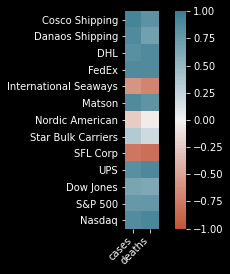

In [ ]:
ax = sns.heatmap(
    CDR_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
corr_loss

,Cases,Deaths,% Change
SFL Corp,-0.79,-0.82,-51.09
International Seaways,-0.59,-0.69,-38.30
Nordic American,-0.23,-0.04,-25.22
Star Bulk Carriers,0.34,0.19,-14.32
DHL,0.84,0.9,36.88
UPS,0.86,0.9,48.23
Matson,0.89,0.81,48.51
FedEx,0.89,0.89,67.28
Danaos Shipping,0.89,0.72,181.60
Cosco Shipping,0.95,0.83,219.69


In [ ]:
# Cases and International Seaways pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['SFL Corp'])

(-0.7865259565991107, 6.1280366656746426e-52)

In [ ]:
# Cases and International Seaways pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['International Seaways'])

(-0.5884927803675167, 7.49982454583938e-24)

In [ ]:
# Cases and Nordic American pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['Nordic American'])

(-0.2316013423952066, 0.00028767475676455794)

In [ ]:
# Cases and Star Bulk Carriers pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['Star Bulk Carriers'])

(0.34459045278741307, 4.0020797181981736e-08)

In [ ]:
# Cases and DHL pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['DHL'])

(0.8439872458630965, 1.336377370269705e-66)

In [ ]:
# Cases and UPS pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['UPS'])

(0.858802104434758, 2.267721045463295e-71)

In [ ]:
# Cases and Matson pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['Matson'])

(0.8936152723946766, 4.065568826778037e-85)

In [ ]:
# Cases and FedEx pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['FedEx'])

(0.8906093201986145, 9.423100244732847e-84)

In [ ]:
# Cases and Danaos Shipping	pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['Danaos Shipping'])

(0.8914095493715155, 4.118337272835785e-84)

In [ ]:
# Cases and Cosco Shipping pearsonr test
stats.pearsonr(covid_stocks_df['cases'], covid_stocks_df['Cosco Shipping'])

(0.9487152956762708, 1.5974708191889485e-121)

Based on the pearsonr testing and looking at the correlations, I can determine that all stocks have a strong correlation to covid. With all the p-values being well below .5, this shows that covid did have some effect on the values. I will now look further into how much of an effect it did have. 

## Independent t-test

To properly perform the t-test, I first created a stock values data frame from the previous year. I will then compare that to the most recent year, where covid has shown to have impacted stock values. 

In [ ]:
!pip install yfinance
import seaborn as sns
import datetime
import yfinance as yf
from pandas_datareader import data as pandas_datareader

In [ ]:
# Set stock values to analyize
prior_stocks = ["AMKBY","CICOY", "DAC", "DPSGY", "FDX", "INSW", "MATX", "NAT", "SBLK", "SFL", "UPS", "^DJI", "^GSPC", "^IXIC"]
# Set start and end dates for during covid-19
start = datetime.datetime(2019, 1, 1)
end   = datetime.datetime(2019, 12, 31)

In [ ]:
# Grab data
prior_data = pdr.get_data_yahoo(stocks, start = start, end = end)
# Select only Adjusted Closed Stock Price
adj_close = ['Adj Close']
prior_data[adj_close]

Attributes Adj Close                    ...                                
Symbols        AMKBY CICOY   DAC DPSGY  ...    UPS     ^DJI   ^GSPC   ^IXIC
Date                                    ...                                
2019-01-02      5.34  1.95 11.90 25.49  ...  90.89 23346.24 2510.03 6665.94
2019-01-03      5.25  1.95 12.18 25.05  ...  88.31 22686.22 2447.89 6463.50
2019-01-04      5.56  1.95 12.74 26.10  ...  91.39 23433.16 2531.94 6738.86
2019-01-07      5.67  1.95 12.74 26.39  ...  91.08 23531.35 2549.69 6823.47
2019-01-08      5.71  1.95 13.16 26.66  ...  91.09 23787.45 2574.41 6897.00
...              ...   ...   ...   ...  ...    ...      ...     ...     ...
2019-12-24      6.81  2.04  9.32 36.80  ... 114.52 28515.45 3223.38 8952.88
2019-12-26      6.93  2.03  9.40 36.66  ... 115.21 28621.39 3239.91 9022.39
2019-12-27      7.01  2.04  9.07 37.26  ... 115.11 28645.26 3240.02 9006.62
2019-12-30      6.92  1.94  9.05 36.58  ... 112.69 28462.14 3221.29 8945.99
2019-12-31      6.92  2.01  9.18 36.72  ... 113.29 28538.44 3230.78 8972.60

[252 rows x 14 columns]

In [ ]:
prior_stocks_df = prior_data[adj_close]
# Relabel columns 
prior_stocks_df.columns = ["Maersk", "Cosco Shipping", "Danaos Shipping", "DHL", "FedEx", "International Seaways", "Matson", "Nordic American", "Star Bulk Carriers", "SFL Corp", "UPS", "Dow Jones", "S&P 500", "Nasdaq"]

In [ ]:
prior_stocks_df

,Maersk,Cosco Shipping,Danaos Shipping,DHL,FedEx,International Seaways,Matson,Nordic American,Star Bulk Carriers,SFL Corp,UPS,Dow Jones,S&P 500,Nasdaq
Date,,,,,,,,,,,,,,
2019-01-02,5.34,1.95,11.90,25.49,158.25,17.48,30.78,1.86,9.35,9.38,90.89,23346.24,2510.03,6665.94
2019-01-03,5.25,1.95,12.18,25.05,152.43,17.57,30.08,1.81,9.25,9.19,88.31,22686.22,2447.89,6463.50
2019-01-04,5.56,1.95,12.74,26.10,159.46,18.53,31.05,1.96,10.03,9.84,91.39,23433.16,2531.94,6738.86
2019-01-07,5.67,1.95,12.74,26.39,161.69,18.87,31.59,1.99,10.30,10.04,91.08,23531.35,2549.69,6823.47
2019-01-08,5.71,1.95,13.16,26.66,161.97,18.73,32.25,1.93,10.43,9.90,91.09,23787.45,2574.41,6897.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,6.81,2.04,9.32,36.80,148.55,28.87,39.77,4.34,11.45,13.07,114.52,28515.45,3223.38,8952.88
2019-12-26,6.93,2.03,9.40,36.66,150.24,28.92,39.99,4.50,11.87,13.15,115.21,28621.39,3239.91,9022.39
2019-12-27,7.01,2.04,9.07,37.26,150.27,28.60,40.12,4.30,11.57,13.09,115.11,28645.26,3240.02,9006.62


In [ ]:
stocks_df

,Maersk,Cosco Shipping,Danaos Shipping,DHL,FedEx,International Seaways,Matson,Nordic American,Star Bulk Carriers,SFL Corp,UPS,Dow Jones,S&P 500,Nasdaq
Date,,,,,,,,,,,,,,
2020-01-02,6.99,2.33,9.40,37.32,152.81,29.45,39.35,4.32,11.38,13.10,113.03,28868.80,3257.85,9092.19
2020-01-03,6.79,2.33,9.19,36.52,150.92,29.62,38.78,4.51,10.99,13.07,112.96,28634.88,3234.85,9020.77
2020-01-06,6.70,2.33,9.61,36.57,151.03,29.59,38.36,4.49,11.13,13.04,112.46,28703.38,3246.28,9071.47
2020-01-07,6.78,2.33,9.58,36.57,152.51,30.25,38.00,4.59,11.69,13.06,112.27,28583.68,3237.18,9068.58
2020-01-08,6.69,2.11,9.44,37.05,154.81,29.30,37.91,4.34,11.48,12.93,112.90,28745.09,3253.05,9129.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,11.17,5.23,21.01,48.76,268.82,16.55,57.26,3.16,8.74,6.18,172.19,30199.87,3703.06,12804.73
2020-12-28,11.19,5.23,21.03,50.11,262.94,16.24,56.74,3.08,8.44,6.03,171.36,30403.97,3735.36,12899.42
2020-12-29,11.25,5.80,20.33,49.76,261.56,16.19,55.75,3.06,8.43,6.06,169.03,30335.67,3727.04,12850.22


In [ ]:
stats.ttest_ind(prior_stocks_df['Maersk'], stocks_df['Maersk'])

Ttest_indResult(statistic=-7.458433791600986, pvalue=3.866701018168747e-13)

In [ ]:
stats.ttest_ind(prior_stocks_df['Cosco Shipping'], stocks_df['Cosco Shipping'])

Ttest_indResult(statistic=-5.130308551523626, pvalue=4.137336614331752e-07)

In [ ]:
stats.ttest_ind(prior_stocks_df['Danaos Shipping'], stocks_df['Danaos Shipping'])

Ttest_indResult(statistic=11.142375294336913, pvalue=6.371271073756567e-26)

In [ ]:
stats.ttest_ind(prior_stocks_df['DHL'], stocks_df['DHL'])

Ttest_indResult(statistic=-11.698038612438681, pvalue=3.976049627885029e-28)

In [ ]:
stats.ttest_ind(prior_stocks_df['FedEx'], stocks_df['FedEx'])

Ttest_indResult(statistic=-5.567619436147245, pvalue=4.2083279281936644e-08)

In [ ]:
stats.ttest_ind(prior_stocks_df['International Seaways'], stocks_df['International Seaways'])

Ttest_indResult(statistic=1.8870300692371613, pvalue=0.05973186199816544)

In [ ]:
stats.ttest_ind(prior_stocks_df['Matson'], stocks_df['Matson'])

Ttest_indResult(statistic=-4.3624957225665435, pvalue=1.5608933360660926e-05)

In [ ]:
stats.ttest_ind(prior_stocks_df['Nordic American'], stocks_df['Nordic American'])

Ttest_indResult(statistic=-22.87138683540387, pvalue=6.706958763004411e-80)

In [ ]:
stats.ttest_ind(prior_stocks_df['Star Bulk Carriers'], stocks_df['Star Bulk Carriers'])

Ttest_indResult(statistic=16.645940680659276, pvalue=6.990075197463191e-50)

In [ ]:
stats.ttest_ind(prior_stocks_df['SFL Corp'], stocks_df['SFL Corp'])

Ttest_indResult(statistic=18.538419135393298, pvalue=7.401585138508888e-59)

In [ ]:
stats.ttest_ind(prior_stocks_df['UPS'], stocks_df['UPS'])

Ttest_indResult(statistic=-10.851729711958853, pvalue=8.557146273815949e-25)

In looking at the results from the Ttest, it is clear to see that there were dramatic changes in the stock values of these companies. The p-value is extreamly small implying that there is a real difference between them. Now look at the confidence interval:

In [ ]:
sample_1_n = prior_stocks_df.shape[0]
sample_2_n = stocks_df.shape[0]
sample_1_mean = prior_stocks_df['UPS'].mean()
sample_2_mean = stocks_df['UPS'].mean()
sample_1_var = prior_stocks_df['UPS'].var()
sample_2_var = stocks_df['UPS'].var()

In [ ]:
import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 18.577281291966354 and 26.750057417291377.


# Conclusion

In looking at the data we are able to determine the following:

1.   Covid-19 had a direct effect on these stocks
2.   That the stocks have begun to level off, possibly indicating that covid-19's effects are starting to lessen.

The Company to which covid affected most was "Cosco Shipping". They saw a 219% increase in thier stock price over 2020. 

The Company to which covid had the most negative impact on was "SFL Corp". They saw thier stock price drop by 51% over the last year.

It is important to note however that "SFL Corp" has other holdings to which may have impacted thier value. 

In looking to invest, I would recomend investing in the companies still showing a increase in stock value as obviously they would offer the greatest return. 



